In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import normalize

In [2]:
with zipfile.ZipFile('AB.zip') as z:
    df = pd.read_csv(z.open('control_data.csv'))

In [3]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [4]:
df.shape

(37, 5)

Проверим данные на пропуски

In [5]:
pd.DataFrame(df.isna().value_counts())

0
Date  Pageviews Clicks Enrollments Payments    
False False     False  False       False     23
                       True        True      14

In [6]:
pd.DataFrame(df.Enrollments.isna().value_counts())

,Enrollments
False,23
True,14


In [7]:
pd.DataFrame(df.Payments.isna().value_counts())

,Payments
False,23
True,14


Пропуски присутствуют в колонках Enrollments и Payments. Заполним их медианным значением.

In [8]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.Enrollments = imp_median.fit_transform(df.Enrollments.values.reshape(-1,1))
df.isna().value_counts()

Date   Pageviews  Clicks  Enrollments  Payments
False  False      False   False        False       23
                                       True        14
dtype: int64

In [9]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.Payments = imp_median.fit_transform(df.Payments.values.reshape(-1,1))
df.isna().value_counts()

Date   Pageviews  Clicks  Enrollments  Payments
False  False      False   False        False       37
dtype: int64

Далее преобразуем данные в более удобный формат

In [10]:
df.Date.describe()

count              37
unique             37
top       Sat, Oct 18
freq                1
Name: Date, dtype: object

Отдельно вычленим день недели

In [11]:
df['DayOfWeek'] = df.Date.map(lambda x : x.split(',')[0])

In [12]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,"Sat, Oct 11",7723,687,134.0,70.0,Sat
1,"Sun, Oct 12",9102,779,147.0,70.0,Sun
2,"Mon, Oct 13",10511,909,167.0,95.0,Mon
3,"Tue, Oct 14",9871,836,156.0,105.0,Tue
4,"Wed, Oct 15",10014,837,163.0,64.0,Wed


In [13]:
df.DayOfWeek.unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [14]:
df.DayOfWeek = df.DayOfWeek.map({'Mon':0, 'Tue':1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6})

In [15]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,"Sat, Oct 11",7723,687,134.0,70.0,5
1,"Sun, Oct 12",9102,779,147.0,70.0,6
2,"Mon, Oct 13",10511,909,167.0,95.0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,1
4,"Wed, Oct 15",10014,837,163.0,64.0,2


Преобразуем дату в стандартый вид и так как год не указан, зададим его сами

In [16]:
def GetDate(s):
    s = s.split(' ')
    month = s[1].replace('Oct', '10').replace('Nov', '11')
    return "2021-" + month + "-" + s[2]

In [17]:
df.Date = df.Date.map(lambda x: GetDate(x.split(',')[1]))

In [18]:
df.Date = pd.to_datetime(df.Date)

In [19]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,2021-10-11,7723,687,134.0,70.0,5
1,2021-10-12,9102,779,147.0,70.0,6
2,2021-10-13,10511,909,167.0,95.0,0
3,2021-10-14,9871,836,156.0,105.0,1
4,2021-10-15,10014,837,163.0,64.0,2


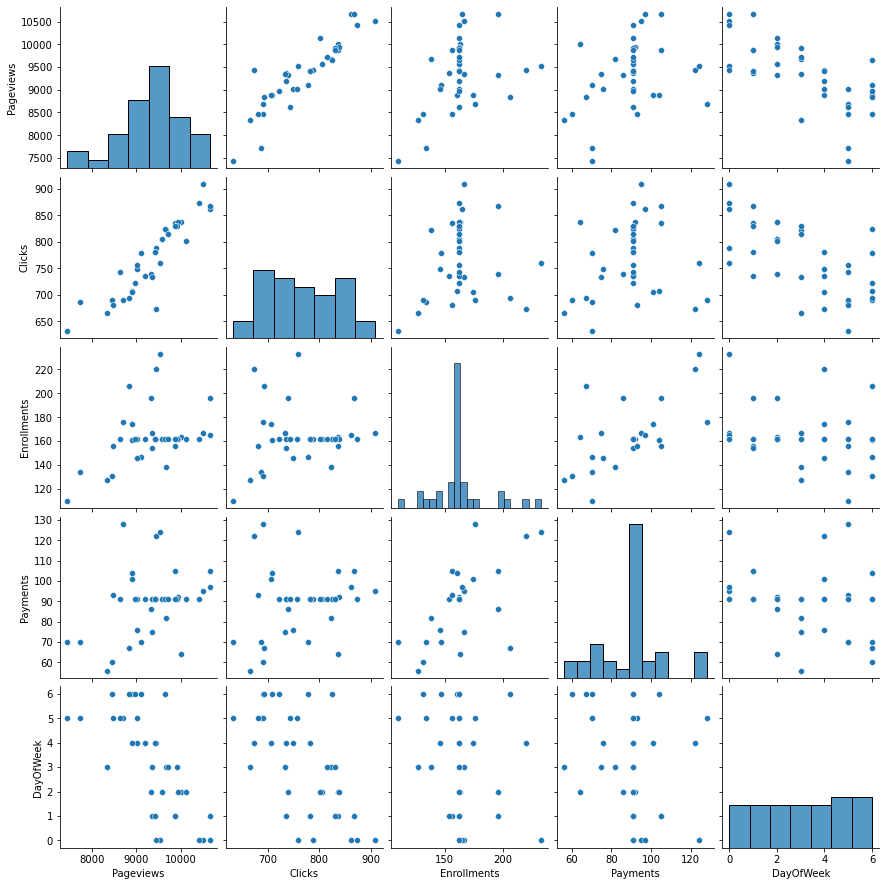

In [20]:
sns.pairplot(df)

In [41]:
#df_norm = pd.DataFrame(data = normalize(df.iloc[:, 1:], norm = 'l2'), columns = df.iloc[:, 1:].columns)
#sns.pairplot(df_norm)

In [22]:
with zipfile.ZipFile('AB.zip') as z:
    df = pd.read_csv(z.open('experiment_data.csv'))

In [23]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [24]:
df.shape

(37, 5)

Проверим данные на пропуски

In [25]:
pd.DataFrame(df.isna().value_counts())

0
Date  Pageviews Clicks Enrollments Payments    
False False     False  False       False     23
                       True        True      14

In [26]:
pd.DataFrame(df.Enrollments.isna().value_counts())

,Enrollments
False,23
True,14


In [27]:
pd.DataFrame(df.Payments.isna().value_counts())

,Payments
False,23
True,14


Пропуски присутствуют в колонках Enrollments и Payments. Заполним их медианным значением.

In [28]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.Enrollments = imp_median.fit_transform(df.Enrollments.values.reshape(-1,1))
df.isna().value_counts()

Date   Pageviews  Clicks  Enrollments  Payments
False  False      False   False        False       23
                                       True        14
dtype: int64

In [29]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.Payments = imp_median.fit_transform(df.Payments.values.reshape(-1,1))
df.isna().value_counts()

Date   Pageviews  Clicks  Enrollments  Payments
False  False      False   False        False       37
dtype: int64

Далее преобразуем данные в более удобный формат

In [30]:
df.Date.describe()

count              37
unique             37
top       Sat, Oct 18
freq                1
Name: Date, dtype: object

Отдельно вычленим день недели

In [31]:
df['DayOfWeek'] = df.Date.map(lambda x : x.split(',')[0])

In [32]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,"Sat, Oct 11",7716,686,105.0,34.0,Sat
1,"Sun, Oct 12",9288,785,116.0,91.0,Sun
2,"Mon, Oct 13",10480,884,145.0,79.0,Mon
3,"Tue, Oct 14",9867,827,138.0,92.0,Tue
4,"Wed, Oct 15",9793,832,140.0,94.0,Wed


In [33]:
df.DayOfWeek.unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [34]:
df.DayOfWeek = df.DayOfWeek.map({'Mon':0, 'Tue':1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6})

In [35]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,"Sat, Oct 11",7716,686,105.0,34.0,5
1,"Sun, Oct 12",9288,785,116.0,91.0,6
2,"Mon, Oct 13",10480,884,145.0,79.0,0
3,"Tue, Oct 14",9867,827,138.0,92.0,1
4,"Wed, Oct 15",9793,832,140.0,94.0,2


Преобразуем дату в стандартый вид и так как год не указан, зададим его сами

In [36]:
def GetDate(s):
    s = s.split(' ')
    month = s[1].replace('Oct', '10').replace('Nov', '11')
    return "2021-" + month + "-" + s[2]

In [37]:
df.Date = df.Date.map(lambda x: GetDate(x.split(',')[1]))

In [38]:
df.Date = pd.to_datetime(df.Date)

In [39]:
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,2021-10-11,7716,686,105.0,34.0,5
1,2021-10-12,9288,785,116.0,91.0,6
2,2021-10-13,10480,884,145.0,79.0,0
3,2021-10-14,9867,827,138.0,92.0,1
4,2021-10-15,9793,832,140.0,94.0,2


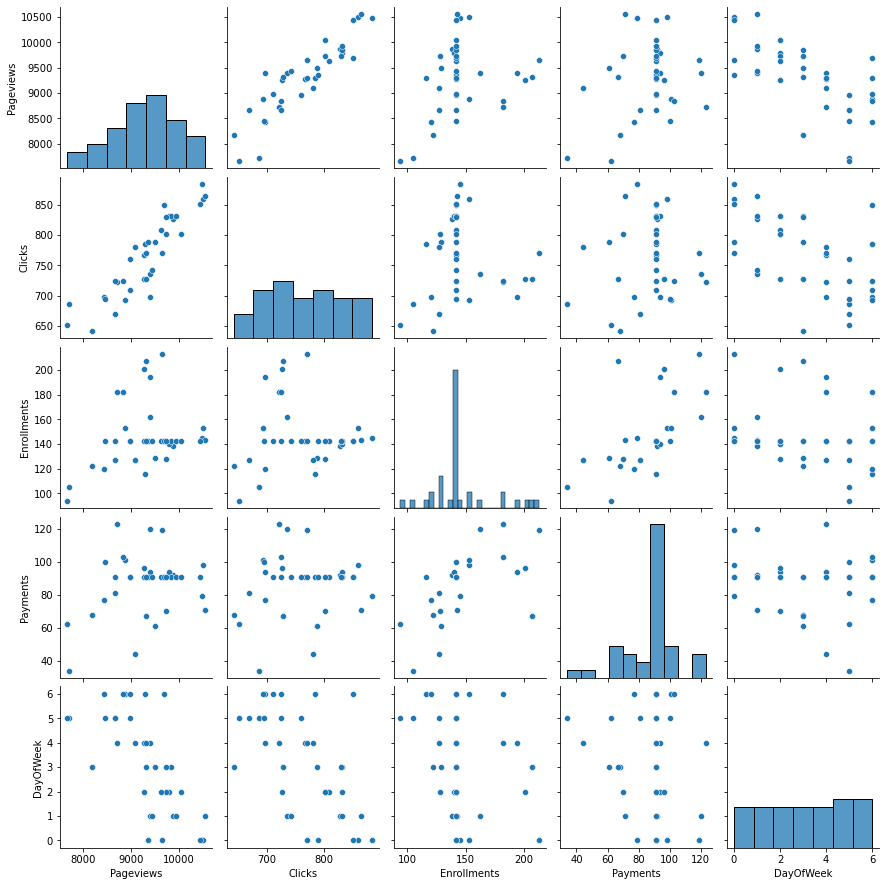

In [40]:
sns.pairplot(df)

In [42]:
display(df)

,Date,Pageviews,Clicks,Enrollments,Payments,DayOfWeek
0,2021-10-11,7716,686,105.0,34.0,5
1,2021-10-12,9288,785,116.0,91.0,6
2,2021-10-13,10480,884,145.0,79.0,0
3,2021-10-14,9867,827,138.0,92.0,1
4,2021-10-15,9793,832,140.0,94.0,2
5,2021-10-16,9500,788,129.0,61.0,3
6,2021-10-17,9088,780,127.0,44.0,4
7,2021-10-18,7664,652,94.0,62.0,5
8,2021-10-19,8434,697,120.0,77.0,6
9,2021-10-20,10496,860,153.0,98.0,0
